In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv("./cleaned_titanic_data.csv")
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [3]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [4]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
round(len(df[df['Survived'] == 0])/ len(df)* 100, 2)

61.62

In [7]:
round(len(df[df['Survived'] == 1])/ len(df)* 100, 2)

38.38

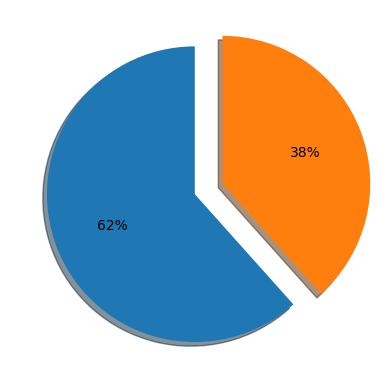

In [9]:
plt.pie(df['Survived'].value_counts(), autopct = '%1.0f%%', shadow=True, startangle=90, explode=(0,0.2))
plt.show()

#  Seprate the data into Independent and Dependent

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [35]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [36]:

y = df['Survived']
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train - Test Split

In [37]:
X_train , X_test, y_train , y_test  = train_test_split(X, y, test_size=0.2, random_state=2)

In [38]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender
30,1,40.000000,0,0,27.7208,1
10,3,4.000000,1,1,16.7000,0
873,3,47.000000,0,0,9.0000,1
182,3,9.000000,4,2,31.3875,1
876,3,20.000000,0,0,9.8458,1
...,...,...,...,...,...,...
534,3,30.000000,0,0,8.6625,0
584,3,29.699118,0,0,8.7125,1
493,1,71.000000,0,0,49.5042,1
527,1,29.699118,0,0,221.7792,1


In [41]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
707,1,42.000000,0,0,26.2875,1
37,3,21.000000,0,0,8.0500,1
615,2,24.000000,1,2,65.0000,0
169,3,28.000000,0,0,56.4958,1
68,3,17.000000,4,2,7.9250,0
...,...,...,...,...,...,...
89,3,24.000000,0,0,8.0500,1
80,3,22.000000,0,0,9.0000,1
846,3,29.699118,8,2,69.5500,1
870,3,26.000000,0,0,7.8958,1


# Model Building

In [42]:
lr  = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [53]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
30,1,40.0,0,0,27.7208,1
10,3,4.0,1,1,16.7000,0
873,3,47.0,0,0,9.0000,1


In [54]:
X_train_pred[:3]

array([0, 1, 0], dtype=int64)

In [55]:
y_train[:3]

30     0
10     1
873    0
Name: Survived, dtype: int64

In [56]:
y_train_pred[:4]

array([0, 1, 0, 0], dtype=int64)

In [57]:
X_test[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
707,1,42.0,0,0,26.2875,1
37,3,21.0,0,0,8.0500,1
615,2,24.0,1,2,65.0000,0


In [58]:
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_train_pred: {len(y_train_pred)}")


Length of y_train: 712
Length of y_train_pred: 712


# Model Evaluation

In [59]:
# TRain

confusion_matrix(y_train, X_train_pred)


array([[395,  54],
       [ 78, 185]], dtype=int64)

<Axes: >

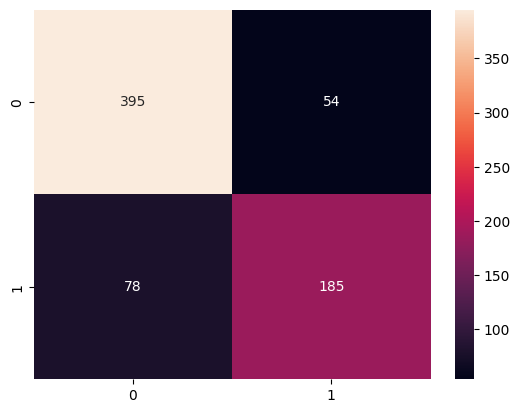

In [60]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='0.3g')

In [61]:
accuracy_score(y_train , y_train_pred)

0.8146067415730337

In [62]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       449
           1       0.77      0.70      0.74       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712



In [63]:
# TEST

confusion_matrix(y_test , y_test_pred)

array([[89, 11],
       [29, 50]], dtype=int64)

<Axes: >

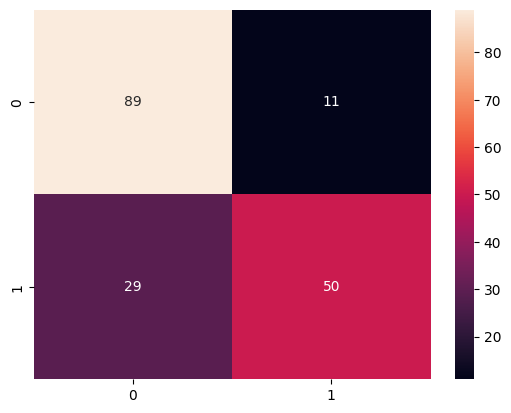

In [67]:
sns.heatmap(confusion_matrix(y_test , y_test_pred), annot=True)

In [66]:
accuracy_score(y_test,y_test_pred)

0.776536312849162

In [69]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.82      0.63      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

